In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load dataset
df = pd.read_csv("data_before_forest.csv")

# Drop unnecessary columns
df = df.drop(columns=["appid", "n_owners", "average_forever"])

# Convert categorical target variable "owners" into numerical labels
df["owners"] = df["owners"].astype("category").cat.codes  # Encodes categories as integers

# Separate features (X) and target (y)
X = df.drop(columns=["owners"])
y = df["owners"]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Compute feature importances using Random Forest
rf_feature_importance = RandomForestClassifier(n_estimators=500, random_state=42)
rf_feature_importance.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
# Sort feature importances
feature_importances = pd.Series(rf_feature_importance.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top features
top_features = {
    15: feature_importances[:15].index.tolist(),
    30: feature_importances[:30].index.tolist(),
    40: feature_importances[:40].index.tolist()
}

In [13]:
from collections import Counter

# Function to compare actual vs. predicted class distribution
def compare_class_distributions(y_actual, y_pred, model_name, num_features):
    # Count class occurrences
    actual_counts = Counter(y_actual)
    predicted_counts = Counter(y_pred)
    
    # Convert to percentages
    actual_ratios = {k: v / len(y_actual) * 100 for k, v in actual_counts.items()}
    predicted_ratios = {k: v / len(y_pred) * 100 for k, v in predicted_counts.items()}
    
    # Convert to DataFrame for visualization
    class_distribution_df = pd.DataFrame({
        "Actual (%)": actual_ratios,
        "Predicted (%)": predicted_ratios
    }).fillna(0)  # Fill missing categories with 0

    print(f"\n🔹 Class Distribution for {model_name} (Top {num_features} Features):")
    print(class_distribution_df)

    # Plot class distribution
    class_distribution_df.plot(kind="bar", figsize=(8, 5), title=f"Class Distribution - {model_name} (Top {num_features})")
    plt.ylabel("Percentage (%)")
    plt.xlabel("Class Label")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


🔹 Training models with Top 15 Features


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:59:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Random Forest Accuracy (Top 15): 0.7231
✅ XGBoost Accuracy (Top 15): 0.7242

🔹 Class Distribution for Random Forest (Top 15 Features):
   Actual (%)  Predicted (%)
0   71.996440      91.594977
2    4.963908       1.621675
4   12.221893       3.569663
3    7.168990       2.185306
1    3.648769       1.028379


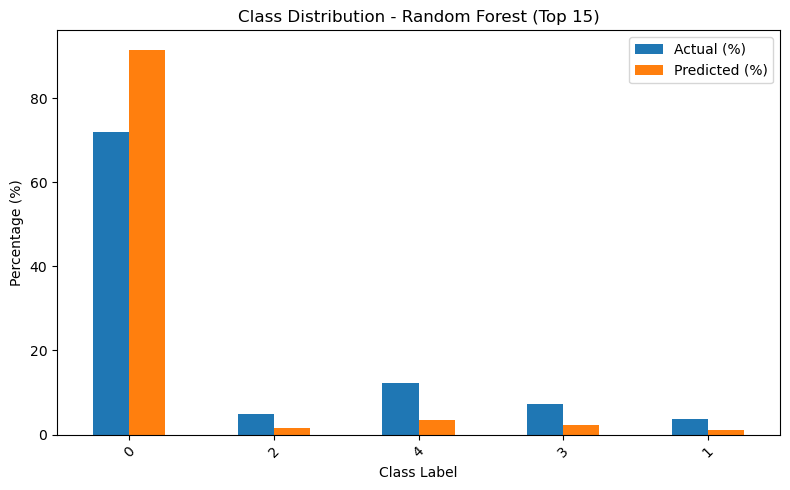


🔹 Class Distribution for XGBoost (Top 15 Features):
   Actual (%)  Predicted (%)
0   71.996440      91.150005
2    4.963908       1.839217
4   12.221893       3.500445
3    7.168990       2.195194
1    3.648769       1.315139


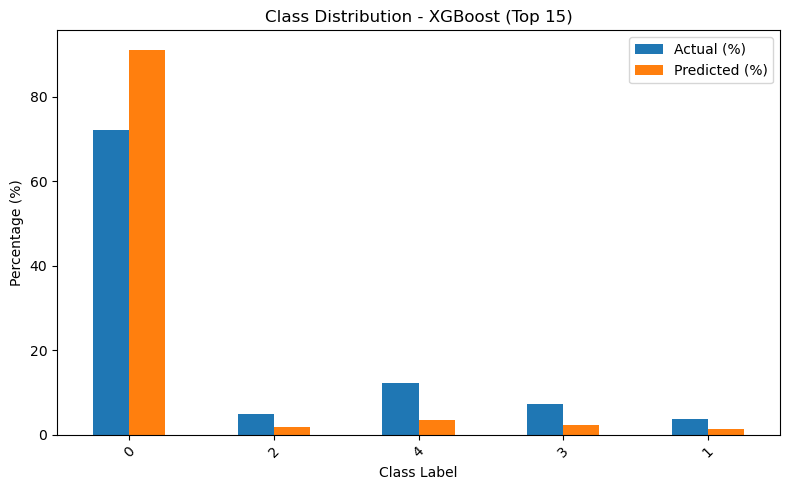


🔹 Training models with Top 30 Features


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:59:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Random Forest Accuracy (Top 30): 0.7273
✅ XGBoost Accuracy (Top 30): 0.7273

🔹 Class Distribution for Random Forest (Top 30 Features):
   Actual (%)  Predicted (%)
0   71.996440      91.931178
2    4.963908       1.611787
4   12.221893       2.976367
3    7.168990       2.422624
1    3.648769       1.058044


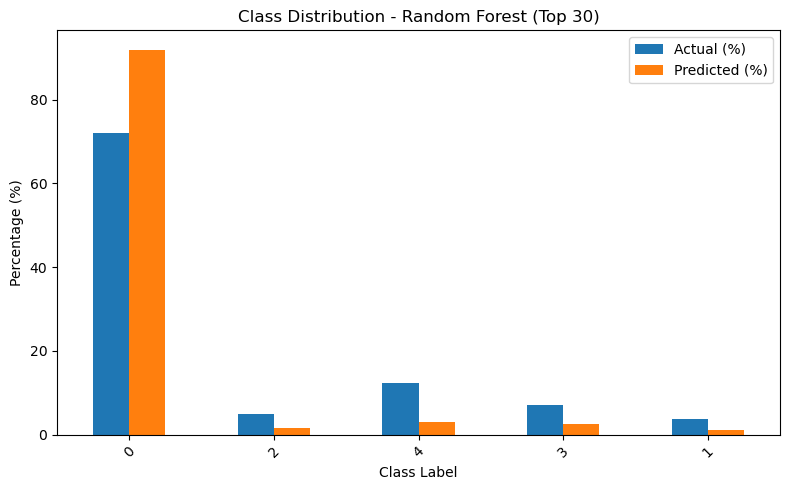


🔹 Class Distribution for XGBoost (Top 30 Features):
   Actual (%)  Predicted (%)
0   71.996440      89.548106
2    4.963908       2.254524
4   12.221893       4.103629
3    7.168990       2.669831
1    3.648769       1.423910


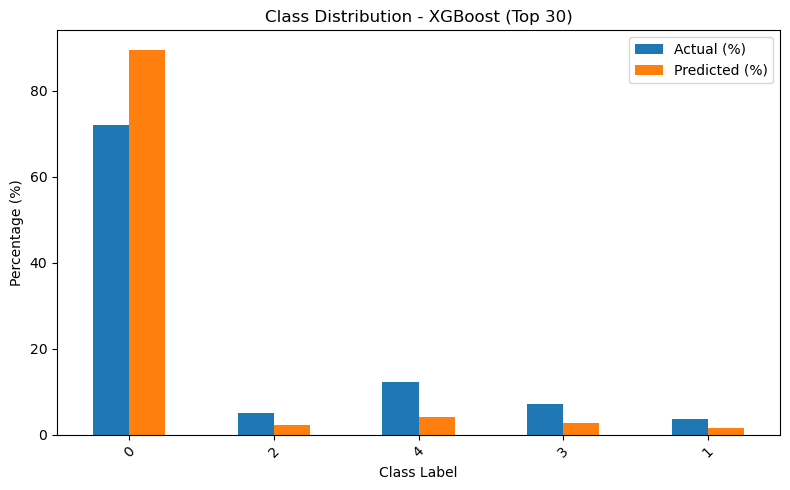


🔹 Training models with Top 40 Features


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Random Forest Accuracy (Top 40): 0.7302
✅ XGBoost Accuracy (Top 40): 0.7269

🔹 Class Distribution for Random Forest (Top 40 Features):
   Actual (%)  Predicted (%)
0   71.996440      92.455256
2    4.963908       1.760111
4   12.221893       2.699496
3    7.168990       2.096312
1    3.648769       0.988826


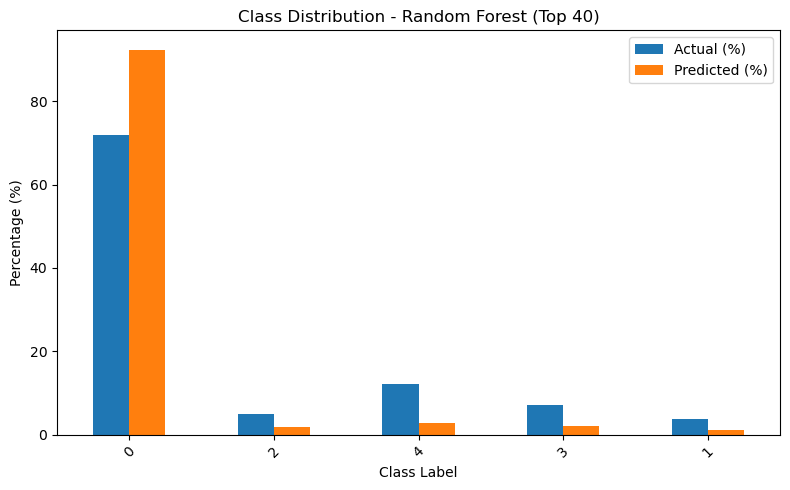


🔹 Class Distribution for XGBoost (Top 40 Features):
   Actual (%)  Predicted (%)
0   71.996440      89.261347
2    4.963908       2.373183
4   12.221893       4.103629
3    7.168990       2.857708
1    3.648769       1.404133


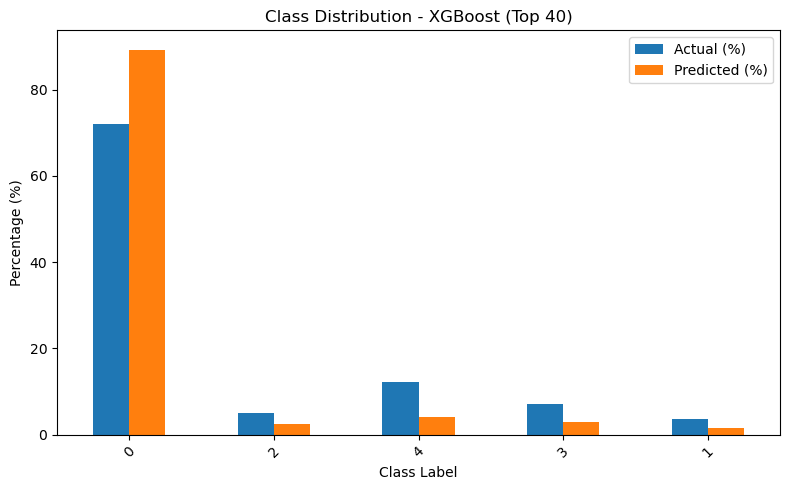

In [14]:
# Initialize results dictionary
results = {}

# Train and evaluate models for different feature sets
for num_features, features in top_features.items():
    print(f"\n - Training models with Top {num_features} Features")

    # Select subset of features
    X_subset = X[features]

    # Split data into training and testing sets (80%-20%)
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42, stratify=y)

    # Train Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=5, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Train XGBoost Model
    xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)

    # Evaluate Models
    rf_accuracy = accuracy_score(y_test, rf_pred)
    xgb_accuracy = accuracy_score(y_test, xgb_pred)

    print(f"Random Forest Accuracy (Top {num_features}): {rf_accuracy:.4f}")
    print(f"XGBoost Accuracy (Top {num_features}): {xgb_accuracy:.4f}")

    # Store results
    results[num_features] = {
        "RF Accuracy": rf_accuracy,
        "XGB Accuracy": xgb_accuracy,
        "RF Report": classification_report(y_test, rf_pred, output_dict=True),
        "XGB Report": classification_report(y_test, xgb_pred, output_dict=True)
    }

    # Compare actual vs. predicted distributions
    compare_class_distributions(y_test, rf_pred, model_name="Random Forest", num_features=num_features)
    compare_class_distributions(y_test, xgb_pred, model_name="XGBoost", num_features=num_features)


In [15]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame({
    "Top 15 Features": [results[15]["RF Accuracy"], results[15]["XGB Accuracy"]],
    "Top 30 Features": [results[30]["RF Accuracy"], results[30]["XGB Accuracy"]],
    "Top 40 Features": [results[40]["RF Accuracy"], results[40]["XGB Accuracy"]]
}, index=["Random Forest", "XGBoost"])

print(results_df)

               Top 15 Features  Top 30 Features  Top 40 Features
Random Forest         0.723129         0.727282         0.730248
XGBoost               0.724216         0.727282         0.726886


# With median playtime forever

In [17]:
# Load dataset
df = pd.read_csv("data_before_forest.csv")

# Drop unnecessary columns
df = df.drop(columns=["appid", "n_owners", "average_forever"])

# Convert categorical target variable "owners" into numerical labels
df["owners"] = df["owners"].astype("category").cat.codes  # Encodes categories as integers

# Separate features (X) and target (y)
X = df.drop(columns=["owners"])
y = df["owners"]

# Compute feature importances using Random Forest
rf_feature_importance = RandomForestClassifier(n_estimators=500, random_state=42)
rf_feature_importance.fit(X, y)

# Sort feature importances
feature_importances = pd.Series(rf_feature_importance.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top features
top_features = {
    15: feature_importances[:15].index.tolist(),
    30: feature_importances[:30].index.tolist(),
    40: feature_importances[:40].index.tolist()
}


🔹 Training models with Top 15 Features


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:01:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Random Forest Accuracy (Top 15): 0.7384
✅ XGBoost Accuracy (Top 15): 0.7412

🔹 Class Distribution for Random Forest (Top 15 Features):
   Actual (%)  Predicted (%)
0   71.996440      83.328389
2    4.963908       3.708098
4   12.221893       5.754969
3    7.168990       5.329774
1    3.648769       1.878770


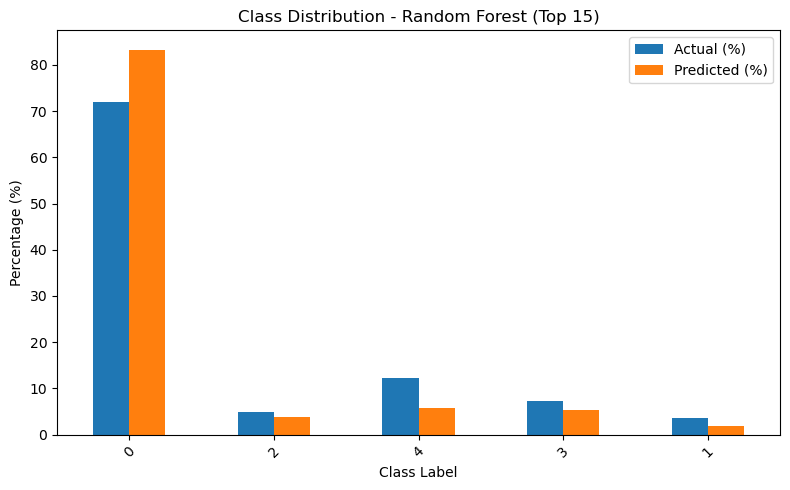


🔹 Class Distribution for XGBoost (Top 15 Features):
   Actual (%)  Predicted (%)
0   71.996440      82.735093
2    4.963908       3.915752
4   12.221893       5.240779
3    7.168990       5.339662
1    3.648769       2.768714


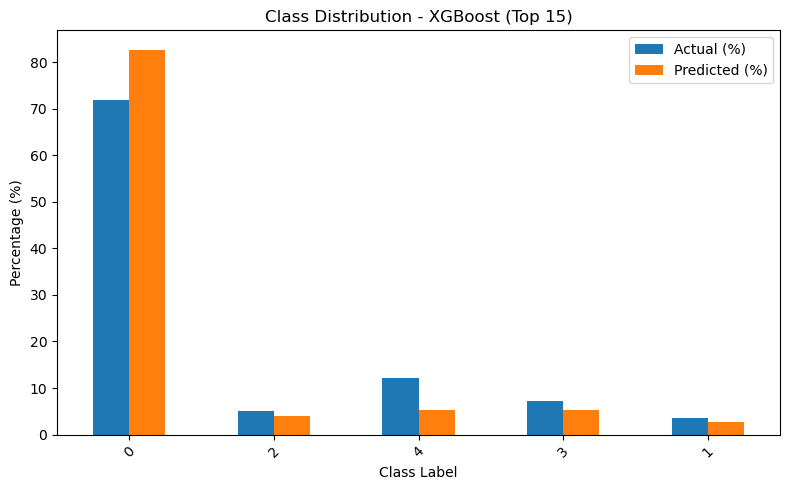


🔹 Training models with Top 30 Features


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:01:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Random Forest Accuracy (Top 30): 0.7447
✅ XGBoost Accuracy (Top 30): 0.7428

🔹 Class Distribution for Random Forest (Top 30 Features):
   Actual (%)  Predicted (%)
0   71.996440      83.259171
2    4.963908       3.530110
4   12.221893       5.715416
3    7.168990       5.695639
1    3.648769       1.799664


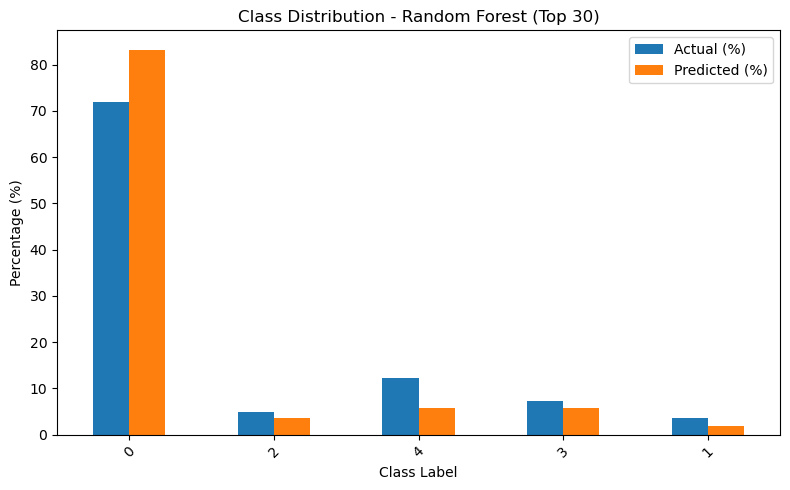


🔹 Class Distribution for XGBoost (Top 30 Features):
   Actual (%)  Predicted (%)
0   71.996440      82.359339
2    4.963908       3.955305
4   12.221893       5.448433
3    7.168990       5.636310
1    3.648769       2.600613


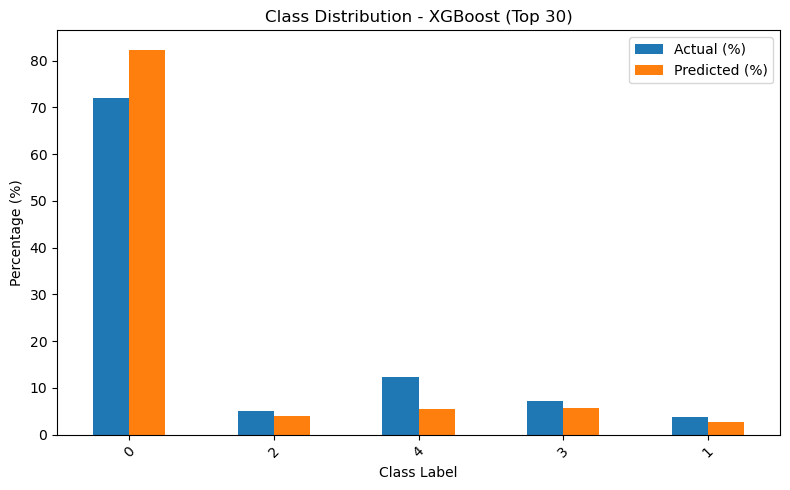


🔹 Training models with Top 40 Features


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:01:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Random Forest Accuracy (Top 40): 0.7444
✅ XGBoost Accuracy (Top 40): 0.7422

🔹 Class Distribution for Random Forest (Top 40 Features):
   Actual (%)  Predicted (%)
0   71.996440      83.763473
2    4.963908       3.411451
4   12.221893       5.576980
3    7.168990       5.616533
1    3.648769       1.631563


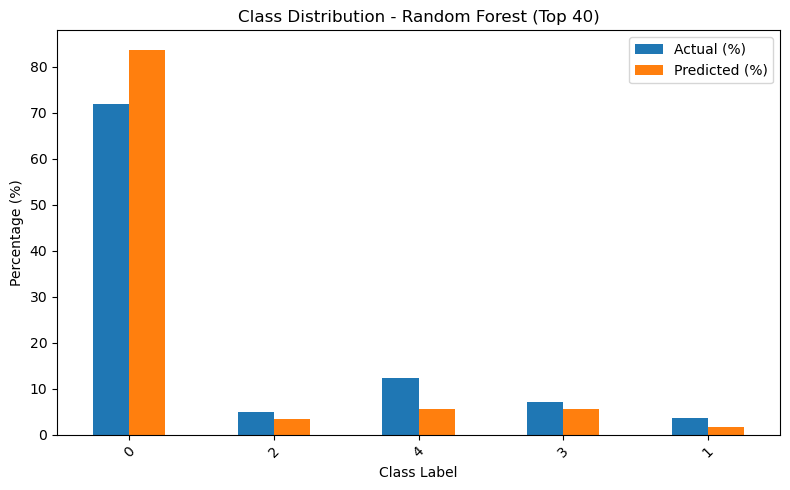


🔹 Class Distribution for XGBoost (Top 40 Features):
   Actual (%)  Predicted (%)
0   71.996440      82.191239
2    4.963908       3.876199
4   12.221893       5.843963
3    7.168990       5.596757
1    3.648769       2.491842


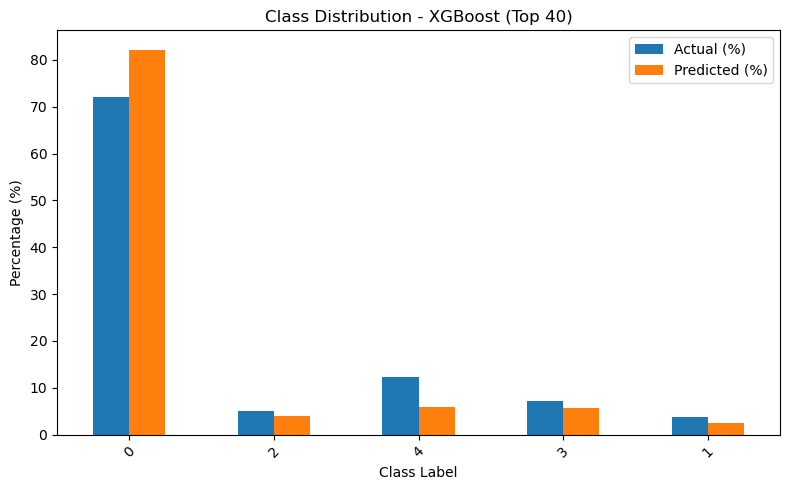

In [18]:
# Initialize results dictionary
results = {}

# Train and evaluate models for different feature sets
for num_features, features in top_features.items():
    print(f"\n - Training models with Top {num_features} Features")

    # Select subset of features
    X_subset = X[features]

    # Split data into training and testing sets (80%-20%)
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42, stratify=y)

    # Train Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=5, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Train XGBoost Model
    xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)

    # Evaluate Models
    rf_accuracy = accuracy_score(y_test, rf_pred)
    xgb_accuracy = accuracy_score(y_test, xgb_pred)

    print(f"Random Forest Accuracy (Top {num_features}): {rf_accuracy:.4f}")
    print(f"XGBoost Accuracy (Top {num_features}): {xgb_accuracy:.4f}")

    # Store results
    results[num_features] = {
        "RF Accuracy": rf_accuracy,
        "XGB Accuracy": xgb_accuracy,
        "RF Report": classification_report(y_test, rf_pred, output_dict=True),
        "XGB Report": classification_report(y_test, xgb_pred, output_dict=True)
    }

    # Compare actual vs. predicted distributions
    compare_class_distributions(y_test, rf_pred, model_name="Random Forest", num_features=num_features)
    compare_class_distributions(y_test, xgb_pred, model_name="XGBoost", num_features=num_features)


In [19]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame({
    "Top 15 Features": [results[15]["RF Accuracy"], results[15]["XGB Accuracy"]],
    "Top 30 Features": [results[30]["RF Accuracy"], results[30]["XGB Accuracy"]],
    "Top 40 Features": [results[40]["RF Accuracy"], results[40]["XGB Accuracy"]]
}, index=["Random Forest", "XGBoost"])

print(results_df)

               Top 15 Features  Top 30 Features  Top 40 Features
Random Forest         0.738357         0.744685         0.744388
XGBoost               0.741224         0.742806         0.742213


In [ ]:
import joblib

# Select top 30 features
top_30_features = top_features[30]
X_train_30 = X[top_30_features]
X_train, X_test, y_train, y_test = train_test_split(X_train_30, y, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest model
rf_model_30 = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=5, random_state=42)
rf_model_30.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(rf_model_30, "random_forest_top30.pkl")
joblib.dump(top_30_features, "top_30_features.pkl")  # Save feature list

print("Model and feature list saved as 'random_forest_top30.pkl' and 'top_30_features.pkl'")


Model and feature list saved as 'random_forest_top30.pkl' and 'top_30_features.pkl'
